In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [2]:
50//0.01

4999.0

In [3]:
df = pd.read_csv('../data/CL_experiments/train/inertia13/2024-10-16--10-57-42_exp  63.csv')
# Find the first index where r changes from 0 to 1
first_non_zero_index = df.index[df['r'].diff().gt(0)].min()
last_index = df.index[df.t > 20].min()
df = df.loc[first_non_zero_index:last_index]  # Keep rows up to that index

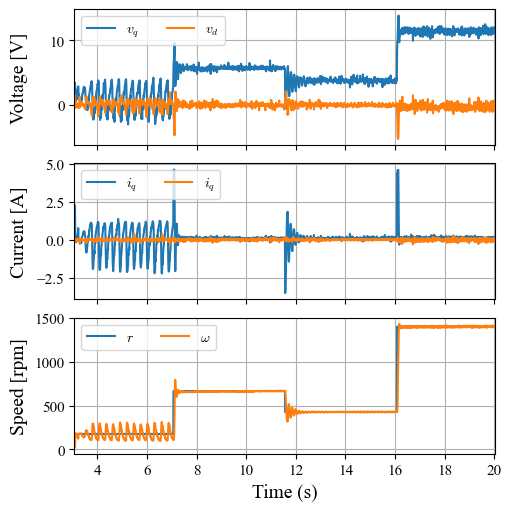

In [4]:
# Create the figure and subplots with shared x-axis
fig, axes = plt.subplots(3, 1, figsize=(5, 5), sharex=True, constrained_layout=True)

axes[0].plot(df.t, df.vq, label='$v_q$')
axes[0].plot(df.t, df.vd, label='$v_d$')
axes[0].set_ylabel('Voltage [V]')
axes[0].legend(ncols=2)


axes[1].plot(df.t, df.iq, label='$i_q$')
axes[1].plot(df.t, df.id, label='$i_q$')
axes[1].set_ylabel('Current [A]')
axes[1].legend(ncols=2)

axes[2].plot(df.t, df.r, label='$r$')
axes[2].plot(df.t, df.omega, label=r'$\omega$')
axes[2].set_ylabel('Speed [rpm]')
axes[2].legend(ncols=2)

# Set the x-label for the last subplot
axes[-1].set_xlabel('Time (s)')
# Align the y-axis labels to the left
for ax in axes:
    ax.yaxis.set_label_coords(-0.11, 0.5)  # Adjust -0.1 based on figure width
    ax.legend(loc='upper left', ncol=2)

# Tight layout for better spacing
# plt.xlim([9, 12])
# plt.savefig('experiment.pdf')
plt.show()

In [89]:
import torch